## 参数解释
sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm=’auto’)

#### 参数：
* n_clusters：整形，缺省值=8；生成的聚类数，即产生的质心（centroids）数。

* max_iter：整形，缺省值=300；执行一次k-means算法所进行的最大迭代数。

* n_init：整形，缺省值=10；用不同的质心初始化值运行算法的次数，最终解是在inertia意义下选出的最优结果。

* init：有三个可选值：'k-means++'， 'random'，或者传递一个ndarray向量。此参数指定初始化方法，默认值为 ‘k-means++’。
    ‘k-means++’ 用一种特殊的方法选定初始质心从而能加速迭代过程的收敛，参见 k_init 的解释获取更多信息。
    ‘random’ 随机从训练数据中选取初始质心。
     如果传递的是一个ndarray，则应该形如 (n_clusters, n_features) 并给出初始质心。

* precompute_distances：三个可选值，‘auto’，True 或者 False。
    预计算距离，计算速度更快但占用更多内存。
    ‘auto’：如果 样本数乘以聚类数大于 12million 的话则不预计算距离。This corresponds to about 100MB overhead per job using double precision.
    True：总是预先计算距离。
    False：永远不预先计算距离。

* tol：float形，默认值= 1e-4
    与inertia结合来确定收敛条件。

* n_jobs：整形数；指定计算所用的进程数。内部原理是同时进行n_init指定次数的计算。
    若值为 -1，则用所有的CPU进行运算。若值为1，则不进行并行运算，这样的话方便调试。若值小于-1，则用到的CPU数为(n_cpus + 1 + n_jobs)。因此如果 n_jobs值为-2，则用到的CPU数为总CPU数减1。

* random_state：整形或 numpy.RandomState 类型，可选
    用于初始化质心的生成器（generator）。如果值为一个整数，则确定一个seed。此参数默认值为numpy的随机数生成器。

* verbose：整形，默认值=0
    Verbosity mode；
    copy_x：布尔型，默认值=True；
    当我们precomputing distances时，将数据中心化会得到更准确的结果。如果把此参数值设为True，则原始数据不会被改变。如果是False，则会直接在原始数据 上做修改并在函数返回值时将其还原。但是在计算过程中由于有对数据均值的加减运算，所以数据返回后，原始数据和计算前可能会有细小差别。


#### 属性：
* cluster_centers_：向量，[n_clusters, n_features]
    Coordinates of cluster centers (每个簇中心的坐标)

* Labels_:
    每个点的分类

* inertia_：float形
    每个点到其簇的质心的距离之和。



#### Notes：
* 这个k-means运用了 Lioyd's 算法.

* 平均计算复杂度是 O(k n T)，其中n是样本量，T是迭代次数。

* 计算复杂读在最坏的情况下为 O(n^(k+2/p))，其中n是样本量，p是特征个数。(D. Arthur and S. Vassilvitskii, ‘How slow is the k-means method?’ SoCG2006）

* 在实践中，k-means算法时非常快的，属于可实践的算法中最快的那一类。但是它的解只是由特定初始值所产生的局部解。所以为了让结果更准确真实，在实践中要用不同的初始值重复几次才可以。



#### Methods：
* fit(X[,y])
    计算k-means聚类。

* fi_predictt(X[,y])
    计算簇质心并给每个样本预测类别。

* fit_transform(X[,y])
    计算簇并 transform X to cluster-distance space。

* get_params([deep])
    取得估计器的参数。

* predict(X)
    给每个样本估计最接近的簇。

* score(X[,y])
    Opposite of the value of X on the K-means objective (?)

* set_params(**params)
    为这个估计器手动设定参数。

* transform(X[,y])
    将X转换入cluster-distance 空间。

# 鸢尾花聚类示例
[源代码地址](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
np.random.seed(5)

iris以鸢尾花的特征作为数据来源，常用在分类操作中。该数据集由3种不同类型的鸢尾花的50个样本数据构成。其中的一个种类与另外两个种类是线性可分离的，后两个种类是非线性可分离的。
该数据集包含了5个属性：
* Sepal.Length（花萼长度），单位是cm;
* Sepal.Width（花萼宽度），单位是cm;
* Petal.Length（花瓣长度），单位是cm;
* Petal.Width（花瓣宽度），单位是cm;
* 种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。

In [7]:
iris = datasets.load_iris()

In [8]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

[4 0 0 0 4 4 0 4 0 0 4 0 0 0 4 4 4 4 4 4 4 4 0 4 0 0 4 4 4 0 0 4 4 4 0 0 4
 0 0 4 4 0 0 4 4 0 4 0 4 0 1 1 1 2 1 2 1 7 1 2 7 2 2 1 2 1 2 2 6 2 6 2 6 1
 1 1 1 1 1 7 2 7 2 6 2 1 1 1 2 2 2 1 2 7 2 2 2 1 7 2 5 6 3 5 5 3 2 3 5 3 5
 6 5 6 6 5 5 3 3 6 5 6 3 6 5 3 6 6 5 3 3 3 5 6 6 3 5 5 6 5 5 5 6 5 5 5 6 5
 5 6]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


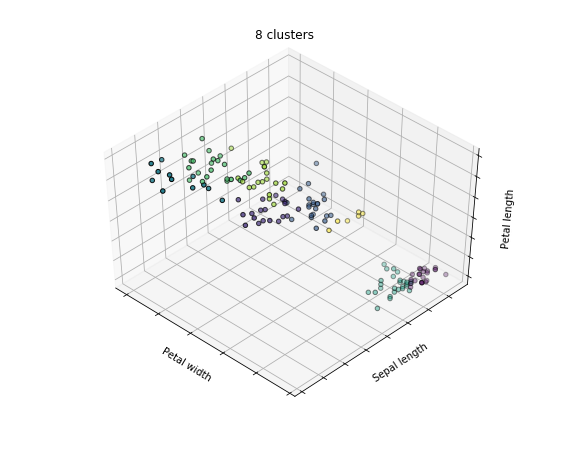

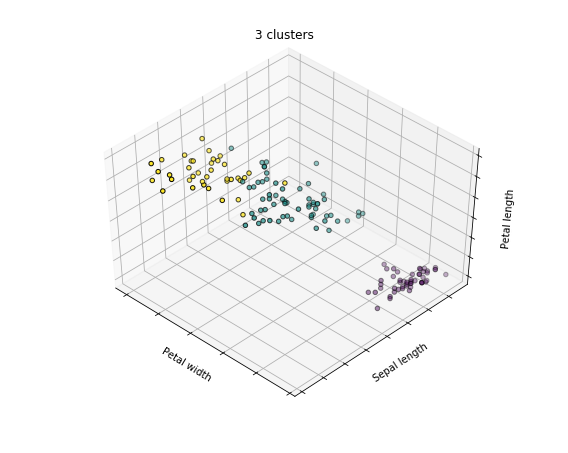

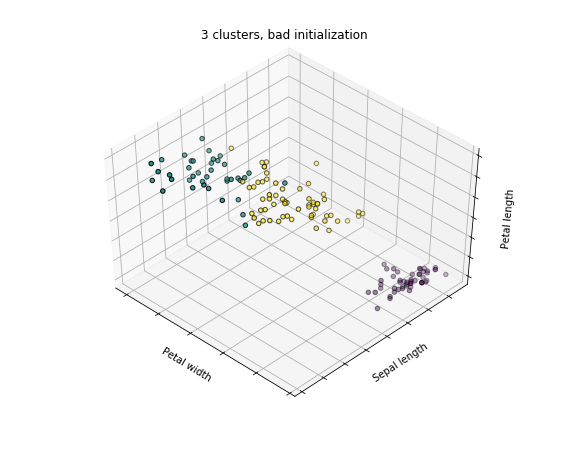

In [23]:
X = iris.data
y = iris.target

# 8个簇，3个簇，3个簇且只随机初始化1次；
estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

# 画出3个聚类效果图
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    print(labels)
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

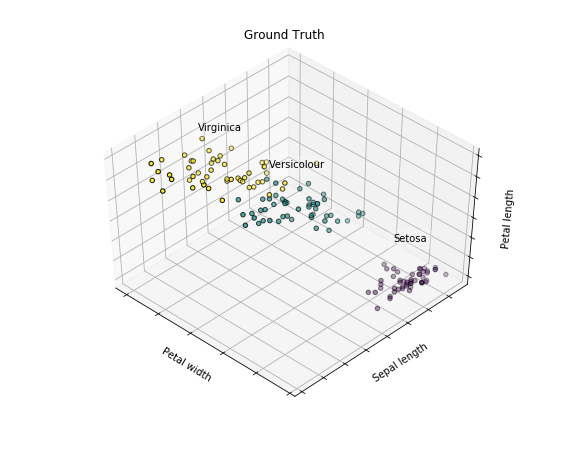

In [29]:
fig = plt.figure(fignum, figsize=(8,6))
ax = Axes3D(fig, rect=[0,0,.95,1], elev = 48, azim=134)

# 在三维图中写出文字
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y==label, 3].mean(),
             X[y==label, 0].mean(),
             X[y==label, 2].mean() + 2, name, horizontalalignment='center',
              bbox = dict(alpha=.2, edgecolor='w', facecolor='w'))

ax.scatter(X[:,3], X[:,0], X[:,2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

# 向量分层示例/k-means图像压缩
[源代码](http://scikit-learn.org/stable/auto_examples/cluster/plot_face_compress.html#sphx-glr-auto-examples-cluster-plot-face-compress-py)

先展示一个浣熊的原图，然后把该图压缩成只有5个值的图片

In [32]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from skimage import io

from sklearn import cluster

(768, 1024)


D:\Software\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Software\Anaconda\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


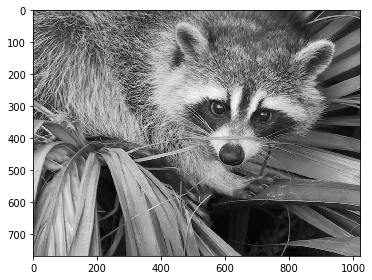

In [37]:
face = sp.misc.face(gray=True)
io.imshow(face)
print(face.shape)

In [36]:
n_cluster = 5
np.random.seed(0)

X = face.reshape([-1,1])
X.shape

(786432, 1)

In [39]:
k_means = cluster.KMeans(n_clusters = n_cluster, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
print(values)
print(labels)

[ 76.36457237 154.76643393  28.15025828 195.41684458 115.96635243]
[4 4 1 ... 1 1 1]


In [42]:
# 查看labels和center的形状
print(values.shape)
print(labels.shape)

(5,)
(786432,)


* np.choose(labels,values) 会从values中按labels取值，得到一个labels形状的数据。
la = [1,2,1,2,1]
va = [5,6,7,8,9]
com = np.choose(la,va)
print(com)

得到
[6 7 6 7 6]

In [49]:
face_compressed = np.choose(labels, values)
print(face_compressed.shape)
face_compressed = face_compressed.reshape(face.shape)
print(face_compressed.shape)

(786432,)
(768, 1024)


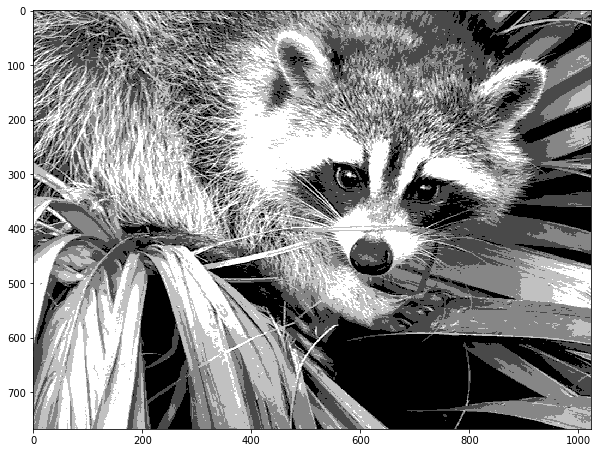

In [64]:
plt.figure(figsize=(10,8))
plt.imshow(face_compressed,cmap='gray')

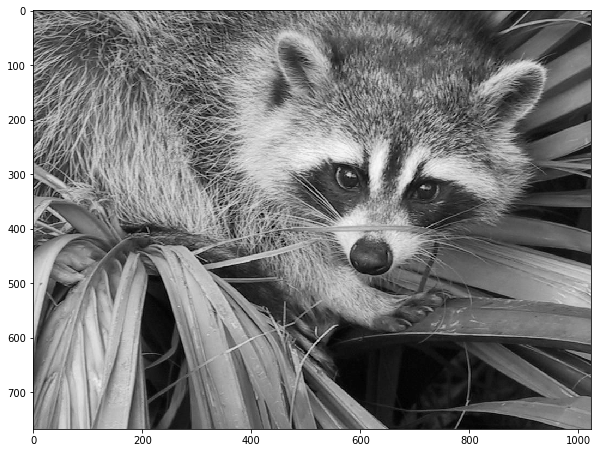

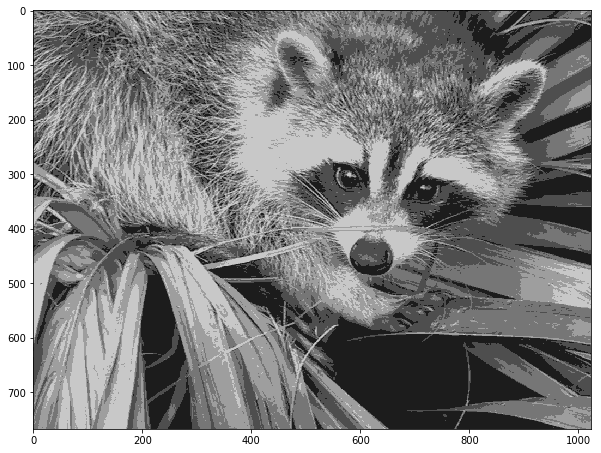

In [56]:
# 原图和压缩图对比
vmin = face.min()
vmax = face.max()
plt.figure(1, figsize=(10, 8))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

# compressed face
plt.figure(2, figsize=(10, 8))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

In [62]:
a = (1,2,3,4,5,3,3,2,23,4)
np.searchsorted([0,4,8], a) - 1 

array([0, 0, 0, 0, 1, 0, 0, 0, 2, 0], dtype=int64)

In [59]:
np.linspace(0,256, 6)

array([  0. ,  51.2, 102.4, 153.6, 204.8, 256. ])

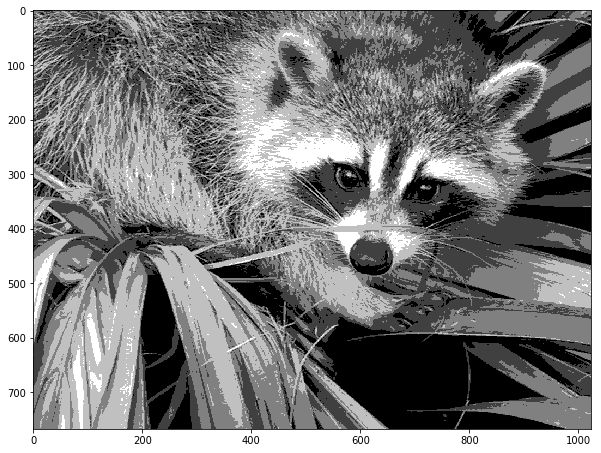

In [68]:
# 直方图压缩

# 生成间隔值
regular_values = np.linspace(0,256, n_cluster + 1)
# 把face按照这些间隔分开，得到这个像素属于哪个间隔的label
regular_labels = np.searchsorted(regular_values, face) - 1
# 找到间隔的中心点
regular_values = (regular_values[1:] + regular_values[:-1]) * 0.5
# 这一步是聚类操作
regular_face = np.choose(regular_labels.ravel(), regular_values.ravel(), mode='clip')

regular_face = regular_face.reshape(face.shape)
plt.figure(figsize=(10,8))
plt.imshow(regular_face, cmap='gray')


### k-mean聚类压缩和直方图压缩的区别展示

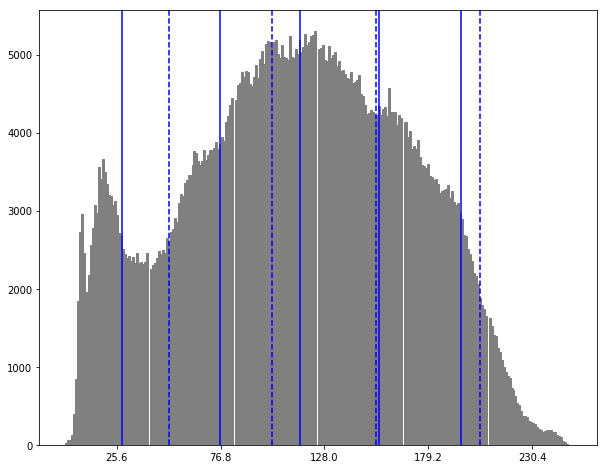

In [76]:
plt.figure(figsize=(10,8))
# 画出直方图
plt.hist(X, bins=256, color='.5', edgecolor='.5')
# 直方图压缩方法每个直方图的中心
plt.xticks(regular_values)

# k-means压缩得的中心值
values = np.sort(values)
# 这里我觉得官方代码写的不对，改掉了;因为这里画出的是聚类中心像素值，values本来就是聚类
# 中心，不需要再平均
# for center_1, center_2 in zip(values[:-1], values[1:]):
#     plt.axvline(.5 * (center_1 + center_2), color='b')

for center_ in values:
    plt.axvline(center_, color='b')

for center_1, center_2 in zip(regular_values[:-1], regular_values[1:]):
    plt.axvline(.5 * (center_1 + center_2), color='b', linestyle='--')